In [2]:
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline 


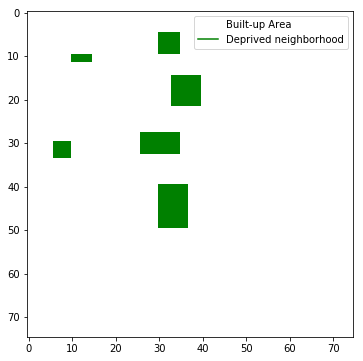

In [3]:
# We create a ground truth (manually) with 7 slums
gt_shape = (75, 75)
ground_truth = np.zeros(gt_shape)
ground_truth[10:12, 10:15] = 1
ground_truth[15:22, 33:40] = 1
ground_truth[28:33, 26:35] = 1
ground_truth[30:34, 6:10] = 1
ground_truth[5:10, 30:35] = 1
ground_truth[40:50, 30:37] = 1

colors = ['white', 'green']
bounds = [0, 1, 2]
cmap = mpl.colors.ListedColormap(colors)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

colors = ['white', 'blue']
bounds = [0, 1, 2]
pred_cmap = mpl.colors.ListedColormap(colors)
pred_norm = mpl.colors.BoundaryNorm(bounds, cmap.N)


plt.figure(figsize=(6,6))
plt.imshow(ground_truth, interpolation='none', cmap=cmap, norm=norm)

plt.plot(0, 0, "-", c=cmap(0), label='Built-up Area')
plt.plot(0, 0, "-", c=cmap(1), label='Deprived neighborhood')

plt.legend()
plt.show()



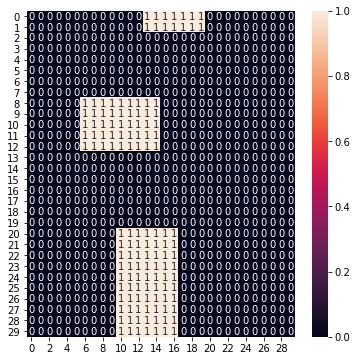

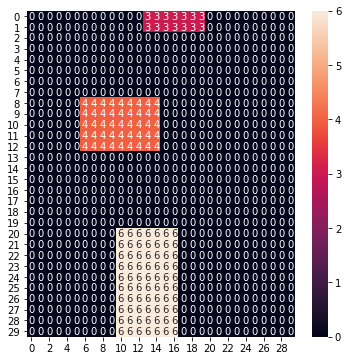

In [4]:
# These images show how the component map labels look after using
# scipy.ndimage.measurements.label
import seaborn as sns
from scipy.ndimage.measurements import label

structure = np.ones((3,3))
labeled, n_components = label(ground_truth, structure)

plt.figure(figsize=(6,6))
sns.heatmap(ground_truth[20:50, 20:50], annot=True)
plt.show()

plt.figure(figsize=(6,6))
sns.heatmap(labeled[20:50, 20:50], annot=True)
plt.show()

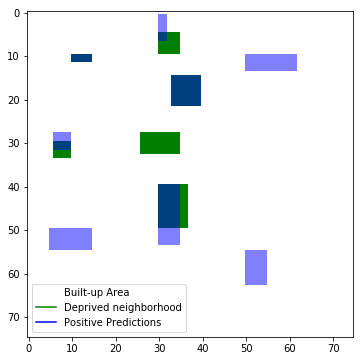

In [5]:

# We manually create a prediction overlay/map of the same shape.
predictions = np.zeros(gt_shape)
predictions[10:12, 10:15] = 1
predictions[15:22, 33:40] = 1
predictions[28:32, 6:10] = 1
predictions[50:55, 5:15] = 1
predictions[55:63, 50:55] = 1
predictions[10:14, 50:62] = 1
predictions[40:54, 30:35] = 1
predictions[40:54, 30:35] = 1
predictions[1:7, 30:32] = 1


predictions_mask = ma.masked_array(predictions, mask=predictions == 0)

plt.figure(figsize=(6, 6))
plt.imshow(ground_truth, interpolation=None, cmap=cmap, norm=norm)
plt.imshow(predictions_mask, cmap=pred_cmap, norm=pred_norm, alpha=0.5) # interpolation='none'

plt.plot(0, 0, "-", c=cmap(0), label='Built-up Area')
plt.plot(0, 0, "-", c=cmap(1), label='Deprived neighborhood')
plt.plot(0, 0, "-", c=pred_cmap(1), label='Positive Predictions')
plt.legend(loc='lower left')
plt.show()



In [6]:
labels = {'other':0, 'slum': 1}


uniq = np.unique(ground_truth, return_counts=True)    
    
print(f"Built-up area examples, label:[{uniq[0][0]}], #examples: {uniq[1][0]} ")
print(f"Slum examples, label:{uniq[0][1]}, #examples: {uniq[1][1]}")

Built-up area examples, label:[0.0], #examples: 5410 
Slum examples, label:1.0, #examples: 215


Some performance metrics on this example:
Accuracy: 0.9523555555555555 

MCC: 0.4563871861708983 

              precision    recall  f1-score   support

       other       0.98      0.97      0.98      5410
        slum       0.41      0.56      0.47       215

   micro avg       0.95      0.95      0.95      5625
   macro avg       0.70      0.77      0.72      5625
weighted avg       0.96      0.95      0.96      5625

[[5236  174]
 [  94  121]]
Confusion matrix, without normalization
[[5236  174]
 [  94  121]]
Normalized confusion matrix
[[0.96783734 0.03216266]
 [0.4372093  0.5627907 ]]


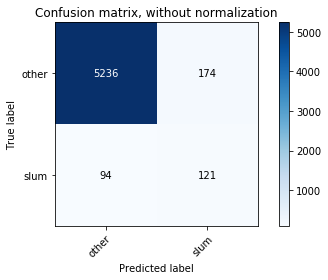

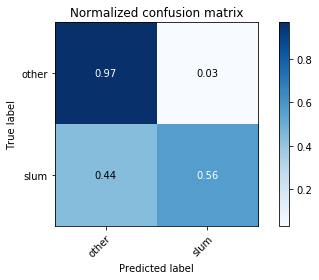

In [7]:

from sklearn.metrics import matthews_corrcoef, classification_report, confusion_matrix, accuracy_score
from sklearn.utils.multiclass import unique_labels


def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    # classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

y_test, y_pred = ground_truth.reshape((-1)), predictions.reshape((-1))
mcc = matthews_corrcoef(ground_truth.reshape((-1)), predictions.reshape((-1)))
accuracy = accuracy_score(ground_truth.reshape((-1)), predictions.reshape((-1)))

print("Some performance metrics on this example:")
print(f"Accuracy: {accuracy} \n")
print(f"MCC: {mcc} \n")
print(classification_report(y_test, y_pred, labels=list(labels.values()), target_names=list(labels.keys())))
print(confusion_matrix(y_test, y_pred))

plot_confusion_matrix(y_test, y_pred, classes=labels)
plot_confusion_matrix(y_test, y_pred, classes=labels, normalize=True)


In [10]:
from scipy.ndimage.measurements import label

def metrics_per_component(predictions, ground_truth, structure, threshold, threshold_true_negative=0.8):
    """Calculates metrics depending on the component on the ground_truth and predictions

    Calculates the true positives, true negatives, false positives and false negatives based
    on a prediction map and a ground_truth map. (which should both be 2D and of the same shape)

    For more information see [1]_.

    Parameters
    ----------
    predictions: numpy.ndarray
        The 2D array of binary predictions
    ground_truth : numpy.ndarray
        The 2D binary ground truth array
    structure: numpy.ndarray
        A structure that defines whether components are linked. (i.e. a 3x3 structure of ones)
        Reference scipy.ndimage.measurements.label for documentation.
    threshold: float
        A float between 0 and 1 that defines a threshold per component, if the fraction of predictions
        for the component is above the threshold, it is counted as a true positive.
    threshold_true_negative: float
        Similarly as above, but this is the threshold to determine whether a component is a true negative.
    """
    assert predictions.ndim == 2
    assert ground_truth.ndim == 2
    assert predictions.shape == ground_truth.shape
    
    # Get components in ground_truth
    labeled, n_components = label(ground_truth, structure)
    component_accuracy_gt, component_labels = component_accuracies(ground_truth, labeled, n_components, predictions)
    
    # Areas that are slums and are classified as such (with a threshold)
    # true_positives = (accuracy_per_pos_group >= threshold).sum()
    true_positives = (component_accuracy_gt[component_labels == 1] >= threshold).sum()
    
    # Areas that are slums but not classified as such (with a threshold)
    # false_negatives = (accuracy_per_pos_group < threshold).sum()
    false_negatives = (component_accuracy_gt[component_labels == 1] < threshold).sum()
    
    # Components correctly classified as non slum (commonly is one or zero)
    true_negatives = (component_accuracy_gt[component_labels == 0] >= threshold_other).sum()
    
    # Get components in predictions, we only need this to calculate the number of false positives
    pred_labeled, n_components_pred = label(predictions, structure)
    component_accuracy_pred = np.zeros(n_components_pred + 1)
    component_pred_labels = np.zeros(n_components_pred + 1)
    for n in range(0, n_components_pred + 1):
        ind = pred_labeled == n
        nr_fp = (ground_truth[ind] != predictions[ind]).sum()
        
        x1,x2 = np.nonzero(ind)
        component_pred_labels[n] = predictions[x1[0], x2[0]]
        
        ratio_fp = nr_fp / ind.sum()
        component_accuracy_pred[n] = ratio_fp
    
    # We calculate the false-positives by taking the 'false positive pixel' predicted components
    # and the 'correct ratios' of these components
    false_positives = (component_accuracy_pred[component_pred_labels == 1] > threshold).sum()
    
    return component_accuracy_gt, component_accuracy_pred, true_positives, false_negatives, false_positives, true_negatives


def component_accuracies(grid_labels, grid_components, n_components, predictions):
    # We calculate the true-positives per component in the ground truth
    component_accuracy_gt = np.zeros(n_components + 1)
    component_labels = np.zeros(n_components + 1)
    for n in range(0, n_components + 1):
        ind = grid_components == n        
        
        nr_correct = (grid_labels[ind] == predictions[ind]).sum()
        
        # if verbose:
        #     print(f"{nr_correct} / {ind.sum()}")
        
        # Determine whether this is a 'negative' or 'positive' component
        x1,x2 = np.nonzero(ind)
        component_labels[n] = grid_labels[x1[0], x2[0]]
        
        ratio_correct = nr_correct / ind.sum()
        component_accuracy_gt[n] = ratio_correct
    
    return component_accuracy_gt, component_labels


def calc_matthews_correlation_coefficient(tp, tn, fp, fn):
    sums = [(tp + fp), (tp + fn), (tn + fp), (tn + fn)]
    denom = np.sqrt(np.prod(sums))
    if denom == 0:
        denom = 1

    return (tp * tn - fp * fn) / denom


def calc_precision(tp, tn, fp, fn):
    return tp / (tp + fp)


def calc_recall(tp, tn, fp, fn):
    return tp / (tp + fn)


def calc_accuracy(tp, tn, fp, fn):
    return (tp + tn) / (tp + tn + fp + fn)
    
# Find connected components (slums):
structure = np.ones((3,3))

# indices = np.indices(ground_truth.shape).T[:,:,[1, 0]]
threshold = 0.5
component_accuracy_gt, component_accuracy_pred, tp, fn, fp, tn = metrics_per_component(predictions, ground_truth, structure, threshold=threshold, verbose=True)


precision = calc_precision(tp, tn, fp, fn)
recall = calc_recall(tp, tn, fp, fn)
accuracy = calc_accuracy(tp, tn, fp, fn)
mcc = calc_matthews_correlation_coefficient(tp, tn, fp, fn)


print(f"Accuracy per groundtruth component: \t [{component_accuracy_gt}]")
print(f"Accuracy per prediction component: \t [{component_accuracy_pred}]\n")

print(f"True positives: \t [{tp}]")
print(f"True negatives: \t [{tn}]")
print(f"False positives: \t [{fp}]")
print(f"False negatives: \t [{fn}]")

print(f"Precision: \t [{ precision }]")
print(f"Recall: \t [{ recall }]")
print(f"Accuracy: [{ accuracy }]")
print(f"F1 Measure: \t [{2 * (precision * recall) / (precision + recall)}]")
print(f"Matthews correlation coefficient: \t [{mcc}]")


Accuracy per groundtruth component: 	 [[0.96783734 0.16       1.         1.         0.         0.5
 0.71428571]]
Accuracy per prediction component: 	 [[0.01763602 0.66666667 0.         1.         0.         0.5
 0.28571429 1.         1.        ]]

True positives: 	 [4]
True negatives: 	 [1]
False positives: 	 [4]
False negatives: 	 [2]
Precision: 	 [0.5]
Recall: 	 [0.6666666666666666]
Accuracy: [0.45454545454545453]
F1 Measure: 	 [0.5714285714285715]
Matthews correlation coefficient: 	 [-0.14907119849998599]


In [11]:
ps = []
rs = []
fs = []
mccs = []

tps = []
fns = []
tns = []
fps = []

thresholds = np.linspace(0.1, 1, 10)
for threshold in thresholds:
    
    accuracy_per_component, accuracy_per_pred_component, tp, fn, fp, tn = metrics_per_component(predictions, ground_truth, structure, threshold=threshold)
    
    # print("t:", threshold)
    # print(accuracy_per_pred_component)
    # print("fp", fp, "tp", tp, "fn", fn)
    
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = 2 * (precision * recall) / (precision + recall)
    mcc = calc_matthews_correlation_coefficient(tp, tn, fp, fn)
    
    ps.append(precision)
    rs.append(recall)
    fs.append(f1_score)
    mccs.append(mcc)
    
    tps.append(tp)
    tns.append(tn)
    fns.append(fn)
    fps.append(fp)
    



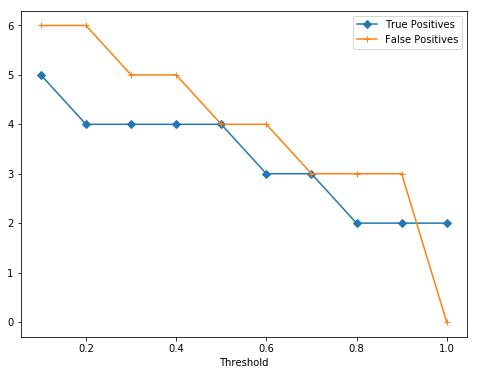

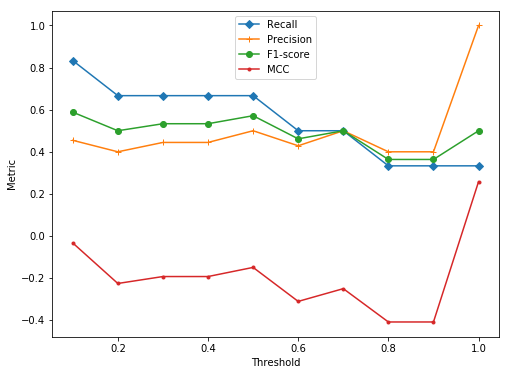

In [12]:
plt.figure(figsize=(8, 6))
plt.plot(thresholds, tps, 'D-', label='True Positives')
# plt.plot(thresholds, tns, 'D-', label='True Negatives')

plt.plot(thresholds, fps, '+-', label='False Positives')
# plt.plot(thresholds, fns, '+-r', label='False Negatives')

# plt.plot(thresholds, np.add(fps, tps), label='FP + TP')
# plt.plot(thresholds, np.add(fns, tns), label='FN + TN')
# plt.plot(thresholds, np.add(tps, tns) + np.add(fns, tns), label='FN + TN + TP + TN')
plt.xlabel('Threshold')
plt.legend()
plt.show()


# plt.figure(figsize=(8, 6))
# plt.plot(thresholds, fs)
# plt.ylabel('F1-measure')
# plt.xlabel('Threshold')
# plt.show()

# plt.figure(figsize=(8, 6))
# plt.plot(thresholds, ps)
# plt.ylabel('Precision')
# plt.xlabel('Threshold')
# plt.show()

# plt.figure(figsize=(8, 6))
# plt.plot(thresholds, rs)
# plt.ylabel('Recall')
# plt.xlabel('Threshold')
# plt.show()

plt.figure(figsize=(8, 6))
plt.plot(thresholds, rs, 'D-', label='Recall')
plt.plot(thresholds, ps, '+-', label='Precision')
plt.plot(thresholds, fs, 'o-', label='F1-score')
plt.plot(thresholds, mccs, '.-', label='MCC')
plt.ylabel('Metric')
plt.xlabel('Threshold')
plt.legend()
plt.show()


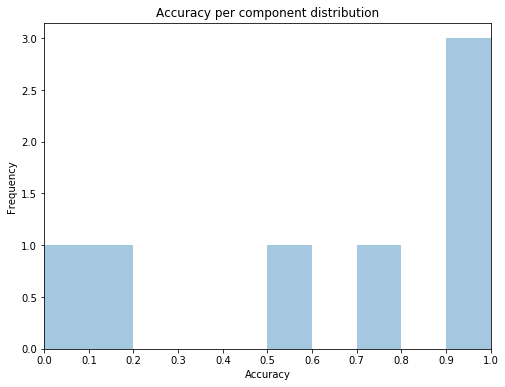

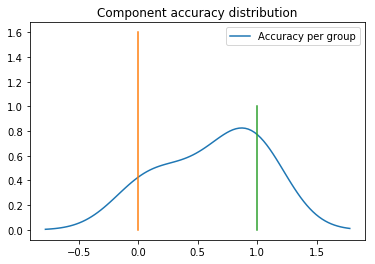

([<matplotlib.axis.XTick at 0x7fe284295e10>,
 <a list of 2 Text xticklabel objects>)

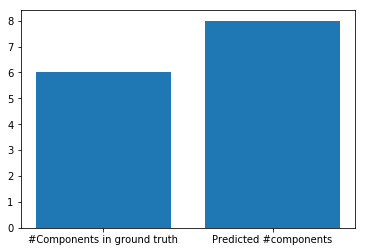

In [12]:
import seaborn as sns

# Get components in ground_truth
labeled, n_components = label(ground_truth, structure)
component_accuracy_gt, component_labels = component_accuracies(ground_truth, labeled, n_components, predictions)

bins = np.arange(0, 1 + 0.1, step=0.1) 
plt.figure(figsize=(8, 6))
sns.distplot(component_accuracy_gt, bins=bins, kde=False)

plt.xticks(bins)
plt.xlim(0, 1)
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.title("Accuracy per component distribution")
plt.show()

sns.kdeplot(component_accuracy_gt, label='Accuracy per group')
plt.legend()
plt.plot([0, 0], [0, 1.6])
plt.plot([1, 1], [0, 1.])
plt.title("Component accuracy distribution")
plt.show()


labeled, n_components = label(ground_truth, structure)
pred_labeled, n_components_pred = label(predictions, structure)
y_pos = np.arange(2)
plt.bar(y_pos, [n_components, n_components_pred])
plt.xticks(y_pos, ['#Components in ground truth', 'Predicted #components'])

